# Study the distortion of the kinematical distributions when applying the event-selection cuts

In [1]:
import sys; sys.path.insert(0, '../..'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Xsec/Figures/distortion_of_distributions/'

In [4]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

285009 ccqe candidate pairs, 187262 in FV
49946 are 1mu-1p, 26.7%
41678 are other pairs, 22.3%
95638 are cosmic, 51.1%
--------------------------------------------------------------
24117 are CC 1p 0pi, 12.9%
--------------------------------------------------------------
26925 are CC 1p, 14.4%
I finished loading overlay samples. We have in total 285009 pairs
95638 cosmic pairs and 49946 mu-p pairs in overlay


In [5]:
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash','length'
               ,'non-collinearity','vertex activity'
               ,'delta phi','Pt & delta phi']
cutlabels = ['preselection','$dE/dx$ profile',r'$N_{flashes}>0$','optical filter','track lengths'
             ,'non-collinearity','vertex activity'
             ,'coplanarity','$p_t<0.35$ GeV/c']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,CC$1 p$ eff.,CC$1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi,CC 1p
no cut,100.0%,26.7%,100.0%,12.9%,100.0%,14.4%,no cut,100.0% (49946),100.0% (41678),100.0% (95638),100.0% (24117),100.0% (26925)
Chi2Proton,63.2%,70.7%,68.7%,37.1%,67.6%,40.8%,Chi2Proton,63.2% (31546),19.3% (8051),5.3% (5028),68.7% (16565),67.6% (18212)
Nflashes,62.9%,72.6%,68.4%,38.1%,67.4%,41.9%,Nflashes,62.9% (31402),19.2% (8010),4.0% (3840),68.4% (16490),67.4% (18134)
MatchedFlash,49.1%,78.7%,53.5%,41.5%,53.0%,45.8%,MatchedFlash,49.1% (24508),12.5% (5221),1.5% (1394),53.5% (12911),53.0% (14265)
length,44.9%,84.0%,49.9%,45.1%,49.0%,49.4%,length,44.9% (22436),7.5% (3130),1.2% (1128),49.9% (12041),49.0% (13189)
non-collinearity,41.0%,87.7%,47.3%,48.8%,46.0%,53.1%,non-collinearity,41.0% (20491),5.5% (2299),0.6% (567),47.3% (11403),46.0% (12398)
vertex activity,30.1%,89.3%,42.5%,60.9%,40.1%,64.3%,vertex activity,30.1% (15015),3.6% (1501),0.3% (295),42.5% (10242),40.1% (10803)
delta phi,19.9%,95.3%,32.3%,74.6%,30.0%,77.3%,delta phi,19.9% (9944),0.9% (378),0.1% (109),32.3% (7785),30.0% (8065)
Pt & delta phi,17.6%,96.3%,29.2%,77.3%,27.1%,80.1%,Pt & delta phi,17.6% (8770),0.6% (270),0.1% (71),29.2% (7042),27.1% (7299)


# what happens to the distributions after each of the cuts?

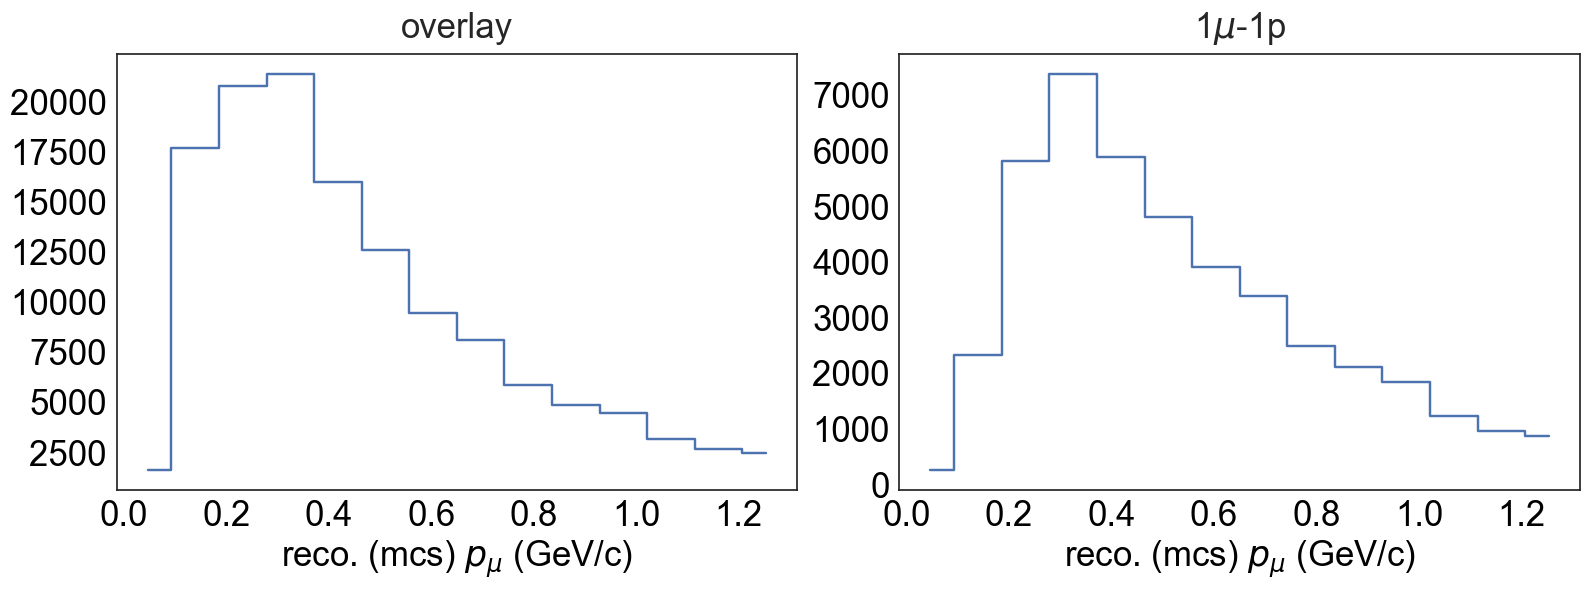

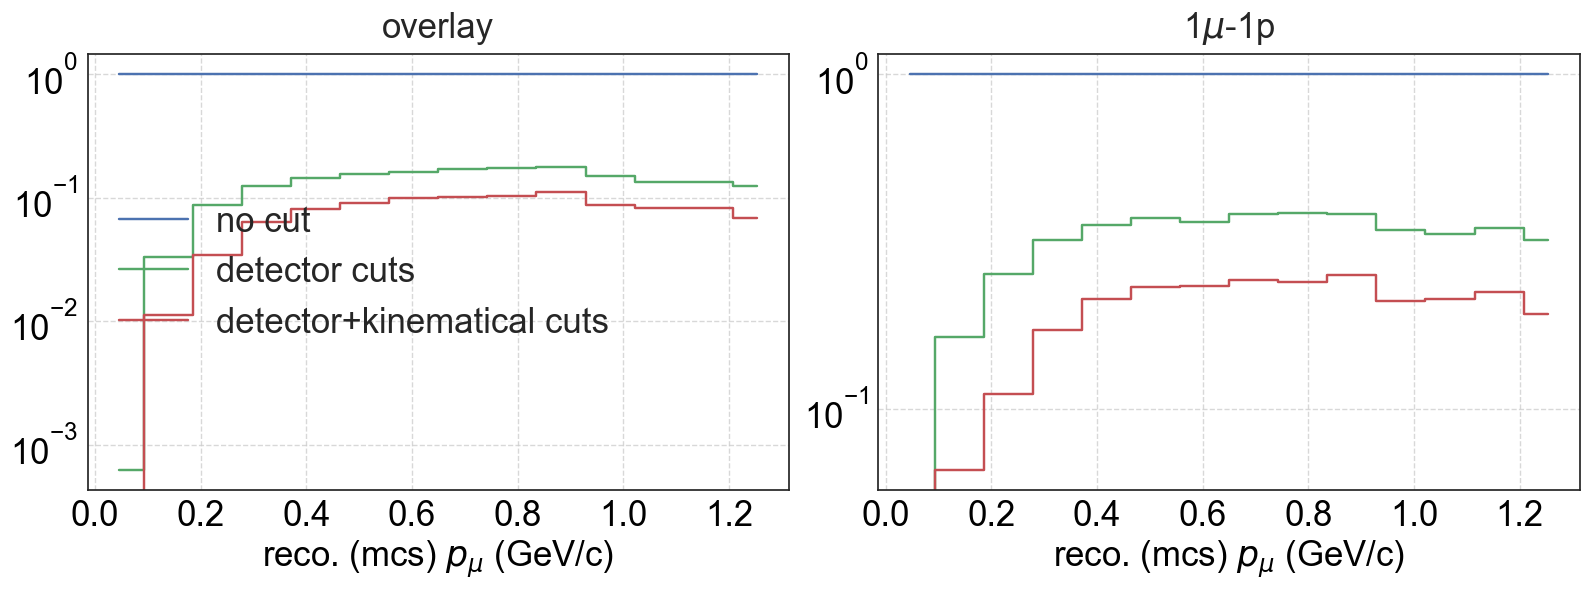

In [50]:
var,x_label,bins = 'reco_Pmu_mcs','reco. (mcs) $p_{\mu}$ (GeV/c)',linspace(0,1.3,15)
# var,x_label,bins = 'reco_Pmu_mcs_theta',r'reco. $\theta_{\mu}$ (deg.)',linspace(0,150,15)
# var,x_label,bins = 'reco_Pp','reco. (range-based) $p_{p}$ (GeV/c)',linspace(0,1.1,15)
# var,x_label,bins = 'reco_Pp_theta',r'reco. $\theta_{p}$ (deg.)',linspace(0,180,15)

mul=180./np.pi if 'deg' in x_label else 1
mid = 0.5*(bins[1:]+bins[:-1])

h,f = dict(),dict()
for cut in ['no cut','vertex activity','Pt & delta phi']:
    overlay_concat = pd.concat([reducedOverlay[cut]['1mu-1p'],reducedOverlay[cut]['cosmic'],reducedOverlay[cut]['other pairs']])
    mup = reducedOverlay[cut]['1mu-1p']
    
    for sam,slabel in zip( [overlay_concat,mup],['overlay','1$\mu$-1p']):
        h[slabel+' '+cut],_ = np.histogram( mul*sam[var] , bins=bins )
        f[slabel+' '+cut] = h[slabel+' '+cut].astype(np.float)/h[slabel+' no cut']
        
fig = plt.figure(figsize=(16,6))
for iax,(sam,slabel) in enumerate(zip( [overlay_concat,mup],['overlay','1$\mu$-1p'])):
    ax = fig.add_subplot(1,2,iax+1)
    plt.step( mid , h[slabel+' no cut'] , where='mid' , label=clabel )
    set_axes(ax,x_label,title=slabel)
plt.tight_layout()

fig = plt.figure(figsize=(16,6))
for iax,(sam,slabel) in enumerate(zip( [overlay_concat,mup],['overlay','1$\mu$-1p'])):
    ax = fig.add_subplot(1,2,iax+1)
    for cut,clabel in zip(['no cut','vertex activity','Pt & delta phi']
                          ,['no cut','detector cuts','detector+kinematical cuts']):
        plt.step( mid , f[slabel+' '+cut] , where='mid' , label=clabel )
    set_axes(ax,x_label,title=slabel,do_add_legend=True if iax==0 else False,do_add_grid=True,legend_loc='center left')
    ax.set_yscale('log')
plt.tight_layout()